# 1. Телеком — задача и описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

##  Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

##  Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

##  План работы :


1. Изучить полученные данные
2. Провести предобработку данных (Удаление ненужных записей, исправление структурных ошибок, удаление выбросов,управление отсутствующими данными)
3. Провести исследовательский анализ данных (Построить гистограммы, провести сравнения для разных групп клиентов)
4. Подготовить данные к расчету модели. (Кодирование категориальных переменных, определение конечного датасета)
5. Моделирование (Разбиение данных, определение исследуемых моделей, тестовая модель, подбор гиперпараметров)
6. Тест моделей. (Сравнение моделей, оценка эффективности моделей)
7. Общий вывод
8. Отчет

## План на исследовательский анализ данных

1. Сравним распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. 
2. Для каждой группы посчитаем статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. 
3. Построим гистограммы распределения.
4. Сравниим поведение клиентов этих двух групп. Для каждой построим два любых графика, изображающих:

- долю пользователей телефонной связи;
- долю интернет-пользователей.

# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import cv
from catboost import Pool
import catboost as cat
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
warnings.filterwarnings('error')
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')


In [3]:
try:
    contract = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\contract.csv', index_col='customerID')
    internet = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\internet.csv', index_col='customerID')
    personal = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\personal.csv', index_col='customerID')
    phone = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv', index_col='customerID')
    internet = pd.read_csv('/datasets/final_provider/internet.csv', index_col='customerID')
    personal = pd.read_csv('/datasets/final_provider/personal.csv', index_col='customerID')
    phone = pd.read_csv('/datasets/final_provider/phone.csv', index_col='customerID')


In [2]:
#contract = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\contract.csv')
#internet = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\internet.csv')
#personal = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\personal.csv')
#phone = pd.read_csv(r'C:\Users\79811\Downloads\final_provider\final_provider\phone.csv')

In [4]:
for data in [contract, internet, personal, phone]: 
    display(data.head())
    (print('*' * 70))

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


**********************************************************************


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


**********************************************************************


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


**********************************************************************


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


**********************************************************************


In [5]:
for data in [contract, internet, personal, phone]:
    display(data.info())
    (print('*' * 70))

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


None

**********************************************************************


**Проведем описание столбцов для лучшего понимания :**

contract:

- customerID - код клиента
- BeginDate - дата начала использования услугами компании
- EndDate - дата окончания использования услугами компании
- Type - тип оплаты: ежемесячно, раз в год или раз в два года
- PaperlessBilling - выставляется ли счет электронно (да/нет)
- PaymentMethod - способ оплаты
- MonthlyCharges - ежемесячный платёж (сумма)
- TotalCharges - сумма всех платежей

internet:

- customerID - код клиента        
- InternetService - тип подключения (DSL или Fiber optic)
- OnlineSecurity - защита онлайн (да/нет)   
- OnlineBackup - онлайн бэкап (да/нет)     
- DeviceProtection -  защита устройства (да/нет)  
- TechSupport - тех. поддержка (да/нет)      
- StreamingTV - онлайнТВ (да/нет)      
- StreamingMovies - онлайн кинотеатр (да/нет)

personal:

- customerID - код клиента
- gender - пол клиента
- SeniorCitizen - возрастной клиент(страше скольки???)
- Partner - состоит ли в браке клиент
- Dependents - есть ли у клиента члены семьи на обеспечении (дети, нетрудоспособные люди)


phone:

- customerID - код клиента
- BeginDate - подключено ли несколько телефонный линий одновременно


**ВЫВОДЫ ПО ДАННЫМ** 

1. количество customerID почти во всех данных различается ( не считая contract и personal). Необходимо проверить на дубликаты.
2. Необходимо привести данные к нужному типу(стобцы TotalCharges к типу float, BeginDate и EndDate к формату даты)

Создадим переменную для ушедших клиентов придав им значения 0(ушёл) и 1(остался)

In [6]:
contract['Client_left'] = contract['EndDate'].apply(lambda x: 1 if x == 'No' else 0)
contract['Client_left'].value_counts()


1    5174
0    1869
Name: Client_left, dtype: int64

In [7]:
contract.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left
customerID,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,1
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0


Столбец дополнительный создали, но для начала попробую объединить все данные в один датафрейм

In [8]:
data = contract.merge(internet, on ='customerID', how = 'left')
data = data.merge(personal, on ='customerID', how = 'left')
data = data.merge(phone, on ='customerID', how = 'left')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Client_left       7043 non-null   int64  
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null 

У нас появились пропуски в данных. Связно это с тем, что если услуга не оказывалась тому или иному клиенту, то её просто не указывают для данного кликнта, отсюда появились и пустые значения. Предлагаю заполнить данные проспуски на значение - NA (Not Applicable)

In [10]:
empty_values= ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for empty in empty_values:
    data[empty] = data[empty].fillna('NA')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Client_left       7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null 

In [12]:
#проверка на дубликаты
data.index.duplicated().sum()

0

Займёмся обработкой столбцов (приведем к нужному типу):

- TotalCharges к типу float 
- BeginDate  к формату даты 
- EndDate  к формату даты 


In [13]:
# data['TotalCharges'] = data['TotalCharges'].astype('float') не смог перевести, кажется тут есть пропуски, посмотрю на этот столбец отдельно
data.query('TotalCharges == " "') 

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,1,DSL,Yes,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,NA
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,1,NA,NA,NA,NA,NA,NA,NA,Male,0,No,Yes,No
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,1,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,1,NA,NA,NA,NA,NA,NA,NA,Male,0,Yes,Yes,Yes
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,1,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,NA
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,1,NA,NA,NA,NA,NA,NA,NA,Male,0,Yes,Yes,No
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,1,NA,NA,NA,NA,NA,NA,NA,Male,0,Yes,Yes,Yes
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,1,NA,NA,NA,NA,NA,NA,NA,Female,0,Yes,Yes,No
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,1,NA,NA,NA,NA,NA,NA,NA,Male,0,Yes,Yes,No


Да пропуски имеются для людей кто является клиентом меньше месяца, заполним пустые значения значениями месячными

In [14]:
data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = data['MonthlyCharges']
data['TotalCharges'] = data['TotalCharges'].astype('float')

Заменим все значения "No" в EndDate на статус Active 

In [15]:
data['BeginDate']=pd.to_datetime(data['BeginDate'],format = '%Y-%m-%d')
data['EndDate']=pd.to_datetime(data.loc[data['EndDate'] != 'No','EndDate'],format = '%Y-%m-%dT%H:%M:%S')

In [16]:
data['EndDate'].fillna('Active',inplace = True) #заменим значение No на Active для удобства

In [17]:
data.info()#проверяем

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Client_left       7043 non-null   int64         
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   object        
 10  OnlineBackup      7043 non-null   object        
 11  DeviceProtection  7043 non-null   object        
 12  TechSupport       7043 non-null   object        
 13  StreamingTV       7043 non-null   object        
 14  StreamingMovie

In [18]:
data.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,Active,Month-to-month,Yes,Electronic check,29.85,29.85,1,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NA
5575-GNVDE,2017-04-01,Active,One year,No,Mailed check,56.95,1889.50,1,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
7795-CFOCW,2016-05-01,Active,One year,No,Bank transfer (automatic),42.30,1840.75,1,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NA
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,0,Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No,Yes
1452-KIOVK,2018-04-01,Active,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,1,Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes,Yes
6713-OKOMC,2019-04-01,Active,Month-to-month,No,Mailed check,29.75,301.90,1,DSL,Yes,No,No,No,No,No,Female,0,No,No,NA
7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,0,Fiber optic,No,No,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes


## Выводы по предобработке 

1. Объединили данные в один датафрейм
2. Именили тип данных на необходимый
3. Проверили на пропуски в данных (пропусков не обнаружено)
4. Сделали описание данных

#  Исследовательский анализ данных 

Задачи:

1. Сравним распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. 
2. Для каждой группы посчитаем статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. 
3. Построим гистограммы распределения.
4. Сравниим поведение клиентов этих двух групп. Для каждой построим два любых графика, изображающих:

- долю пользователей телефонной связи;
- долю интернет-пользователей.

Для дополнительного удобства нам необходимо создать несколько признаков:

1. Где клиент пользуется всеми услугами
2. Где клиент использует только интернет 
3. Где клиент использует только телефон

In [19]:
data['Services'] = 0 #все услуги
data.loc[data['MultipleLines'] == 'NA', 'Services'] = 1
data.loc[data['InternetService'] == 'NA', 'Services'] = 2

In [20]:
data['Services'].value_counts()

0    4835
2    1526
1     682
Name: Services, dtype: int64

В столбце EndDate появились значения NaT (почему я не очень понял). Хочу исправить неизвестные значения на No. Заодно создадим отдельный датафрейм с уже ушедшими клиентами для предстоящего анализа. 

In [21]:
data['EndDate'] = data['EndDate'].fillna('No')

In [22]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Services
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,Active,Month-to-month,Yes,Electronic check,29.85,29.85,1,DSL,No,...,No,No,No,No,Female,0,Yes,No,NA,1
5575-GNVDE,2017-04-01,Active,One year,No,Mailed check,56.95,1889.50,1,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,0
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,0
7795-CFOCW,2016-05-01,Active,One year,No,Bank transfer (automatic),42.30,1840.75,1,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,NA,1
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,0


In [23]:
data_left = data[data['EndDate'] != 'Active']

Сравним распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл.

In [24]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [25]:
data_left['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Для группыe ушедших польхователей статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей превышают расходы общей группы (не считая максимума)

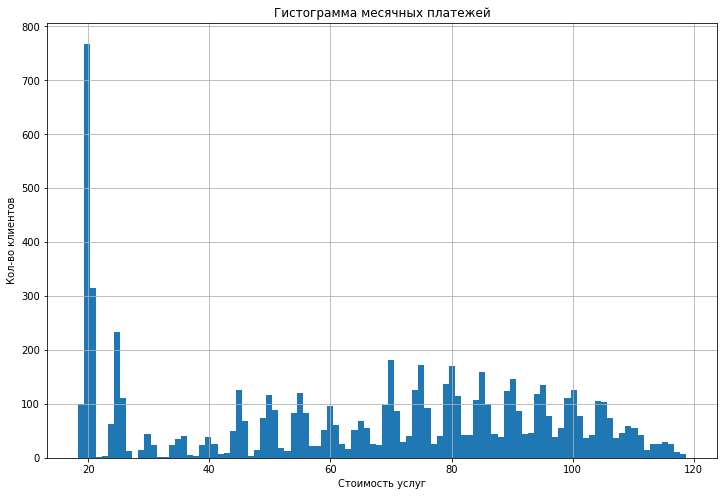

In [26]:
plt.figure(figsize =(12,8))
data['MonthlyCharges'].plot(kind = 'hist', bins = 100, grid =True)
plt.title('Гистограмма месячных платежей')
plt.xlabel('Стоимость услуг')
plt.ylabel('Кол-во клиентов')
plt.show()

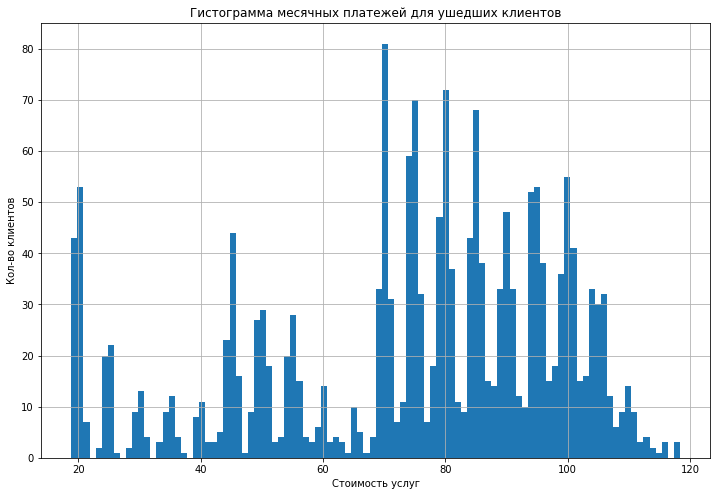

In [27]:
plt.figure(figsize =(12,8))
data_left['MonthlyCharges'].plot(kind = 'hist', bins = 100, grid =True)
plt.title('Гистограмма месячных платежей для ушедших клиентов')
plt.xlabel('Стоимость услуг')
plt.ylabel('Кол-во клиентов')
plt.show()



Выводы:

- Исходя из гистограмм , большая часть людей ушла, которая платила больше 70 долларов в месяц. Можно предположить, что высокая цена за услуги стала основным поводом оттока клиентов. Может быть компания в определенный период повысила цены на тарифы, отсюда и большая утечка клиентов. 

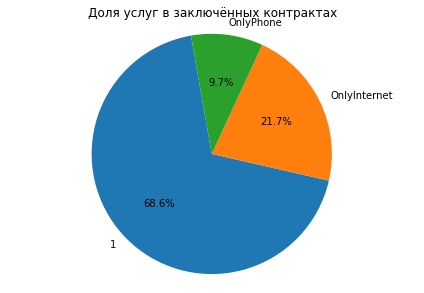

In [28]:
labels  = ['1', 'OnlyInternet', 'OnlyPhone']
columns = data['Services'].value_counts().values

fig1,ax1 = plt.subplots()
ax1.pie (columns, labels=labels, autopct = '%1.1f%%', startangle = 100)

ax1.axis('equal')
plt.tight_layout()
plt.title ('Доля услуг в заключённых контрактах')
plt.show()

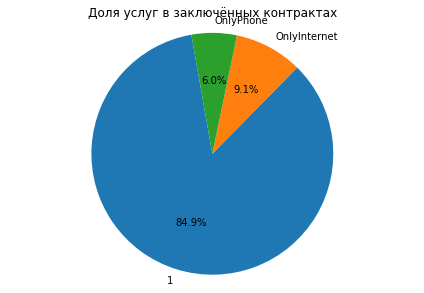

In [29]:
labels  = ['1', 'OnlyInternet', 'OnlyPhone']
client_left  = data.query ('Client_left == 0')
columns = client_left['Services'].value_counts().values

fig1,ax1 = plt.subplots()
ax1.pie (columns, labels=labels, autopct = '%1.1f%%', startangle = 100)

ax1.axis('equal')
plt.tight_layout()
plt.title ('Доля услуг в заключённых контрактах')
plt.show()

Выводы :

1. 69 % клиентов пользуются всеми услугами предоставляемыми компанией. 10 % пользуются только телефоном и 21% пользуются только интернетом

2. Из ушедших клиентов 85 % пльзовались всеми услугами, 6% только телефоном, а 9% только интернетом.

- Отюсда можно сделать вывод, что проблема заключается не в конкретной услуге, а в целом клиенты не довольны компанией. Опять же, возможно предоставляемые услуги сильно возрасли в цене. 

Хочу ещё посмотреть на гистрограмму ушедших клиентов по году их подключения:

In [30]:
data['Begin_Year'] = pd.DatetimeIndex(data['BeginDate']).year #округлим до года для удобства просмотра

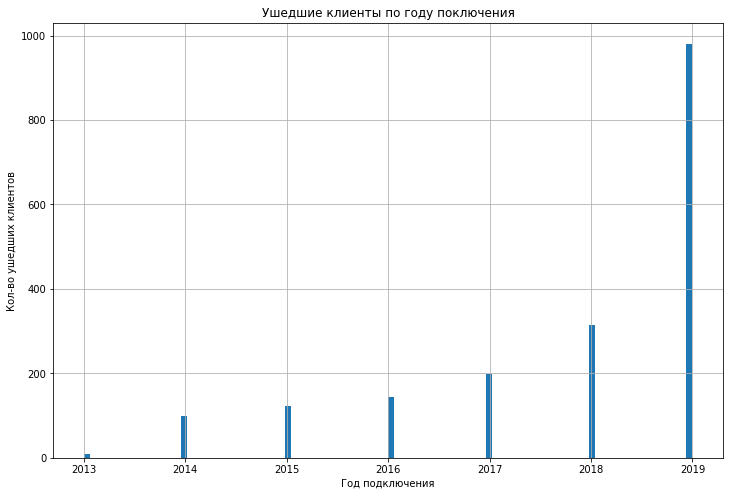

In [31]:
plt.figure(figsize =(12,8))
data.query('Client_left == 0')['Begin_Year'].plot(kind = 'hist', bins = 100, grid =True)
plt.title('Ушедшие клиенты по году поключения')
plt.xlabel('Год подключения')
plt.ylabel('Кол-во ушедших клиентов')
plt.show()


Хм, график показывает нам, что самый большой отток был в 2019 году. Может компнаия таки ввела новую ценовую политику и тарифы сильно выросли в цене.

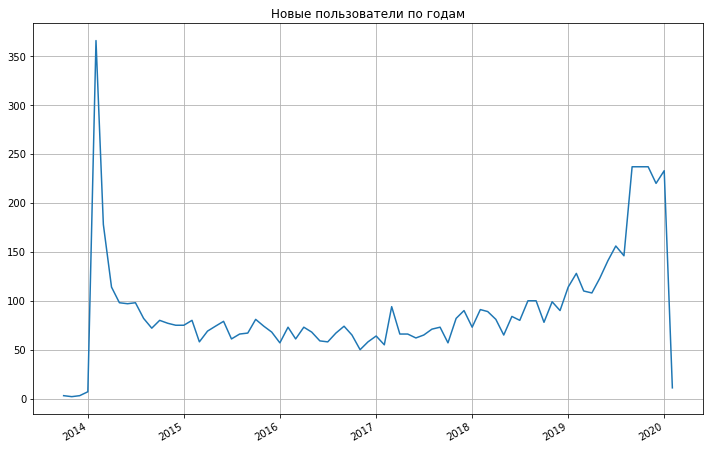

In [32]:
data['BeginDate'].value_counts().plot(grid = True, figsize = (12,8))
plt.title('Новые пользователи по годам')
plt.show()

С 2018 года наблюдался рост клиентов, а к концу 2019 произошёл дикий обвал, пользователи начали повально отказываться от наших услуг

## Выводы по исследовательскому анализу


- Подготовили данные, пропуски убрали, необходимые типы данных изменили, добавили новый признак Client_left с информацией ушёл ли от нас клиент. 
- 69 % клиентов пользуются всеми услугами предоставляемыми компанией. 10 % пользуются только телефоном и 21% пользуются только интернетом
- Из ушедших клиентов 85 % пльзовались всеми услугами, 6% только телефоном, а 9% только интернетом.
- Отюсда можно сделать вывод, что проблема заключается не в конкретной услуге, а в целом клиенты не довольны компанией. Опять же, возможно предоставляемые услуги сильно возрасли в цене. 
- Самый большой отток клиентов был в 2019 году (точнее к концу года случился просто обвал)

# Подготовка к  моделированию

Бинарные категориальные переменные будем кодироват вручную, Yes No переводим в 1 и 0 соответсвенно

In [34]:
df = data

In [35]:
data['MultipleLines'] = pd.Series(np.where(data['MultipleLines'].values == 'Yes', 1, 0),data.index)
data['Dependents'] = pd.Series(np.where(data['Dependents'].values == 'Yes', 1, 0),data.index)
data['Partner'] = pd.Series(np.where(data['Partner'].values == 'Yes', 1, 0),data.index)
data['gender'] = pd.Series(np.where(data['gender'].values == 'Female', 1, 0),data.index)
data['StreamingMovies'] = pd.Series(np.where(data['StreamingMovies'].values == 'Yes', 1, 0),data.index)
data['StreamingTV'] = pd.Series(np.where(data['StreamingTV'].values == 'Yes', 1, 0),data.index)
data['TechSupport'] = pd.Series(np.where(data['TechSupport'].values == 'Yes', 1, 0),data.index)
data['DeviceProtection'] = pd.Series(np.where(data['DeviceProtection'].values == 'Yes', 1, 0),data.index)
data['OnlineBackup'] = pd.Series(np.where(data['OnlineBackup'].values == 'Yes', 1, 0),data.index)
data['OnlineSecurity'] = pd.Series(np.where(data['OnlineSecurity'].values == 'Yes', 1, 0),data.index)
data['PaperlessBilling'] = pd.Series(np.where(data['PaperlessBilling'].values == 'Yes',1,0),data.index)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   int64         
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Client_left       7043 non-null   int64         
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   int64         
 10  OnlineBackup      7043 non-null   int64         
 11  DeviceProtection  7043 non-null   int64         
 12  TechSupport       7043 non-null   int64         
 13  StreamingTV       7043 non-null   int64         
 14  StreamingMovie

In [37]:
data.head(1)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Services,Begin_Year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,Active,Month-to-month,1,Electronic check,29.85,29.85,1,DSL,0,...,0,0,0,1,0,1,0,0,1,2020


Оставшиеся переменных будет кодировать через OHE  (OneHotEncoder)

In [38]:
data = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

In [39]:
#data.drop('Services', axis = 1, inplace = True)

In [40]:
data['BeginDate'].max()

Timestamp('2020-02-01 00:00:00')

Необходимо поменять значение Active в столбце EndDate на дату последнего заполнения датасета ('2020-02-01 00:00:00'). Столбец lasted переименуем в duration для лучшего отображения после изменеиий

In [41]:
data['EndDate'] = data['EndDate'].replace('Active', '2020-02-01')

In [42]:
data.head(1)

,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MultipleLines,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,1,29.85,29.85,1,0,1,0,0,...,0,1,2020,0,0,0,0,0,1,0


In [43]:
data['lasted'] = (pd.to_datetime(data['EndDate']) - data['BeginDate']).dt.days

In [44]:

data.rename({'lasted': 'duration'}, axis=1, inplace=True)

In [45]:
data.head(1)

,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,1,29.85,29.85,1,0,1,0,0,...,1,2020,0,0,0,0,0,1,0,31


Удалим стобцы с датой дабы избежать утечки данных

In [46]:
data.drop('EndDate', axis = 1, inplace = True)
data.drop('BeginDate', axis = 1, inplace = True)

In [47]:
data['Client_left'].value_counts()

1    5174
0    1869
Name: Client_left, dtype: int64

In [48]:
data

,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,1,0,1,0,0,0,0,...,1,2020,0,0,0,0,0,1,0,31
5575-GNVDE,0,56.95,1889.50,1,1,0,1,0,0,0,...,0,2017,1,0,0,0,0,0,1,1036
3668-QPYBK,1,53.85,108.15,0,1,1,0,0,0,0,...,0,2019,0,0,0,0,0,0,1,61
7795-CFOCW,0,42.30,1840.75,1,1,0,1,1,0,0,...,1,2016,1,0,0,0,0,0,0,1371
9237-HQITU,1,70.70,151.65,0,0,0,0,0,0,0,...,0,2019,0,0,1,0,0,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,84.80,1990.50,1,1,0,1,1,1,1,...,0,2018,1,0,0,0,0,0,1,730
2234-XADUH,1,103.20,7362.90,1,0,1,1,0,1,1,...,0,2014,1,0,1,0,1,0,0,2191
4801-JZAZL,1,29.60,346.45,1,1,0,0,0,0,0,...,1,2019,0,0,0,0,0,1,0,337


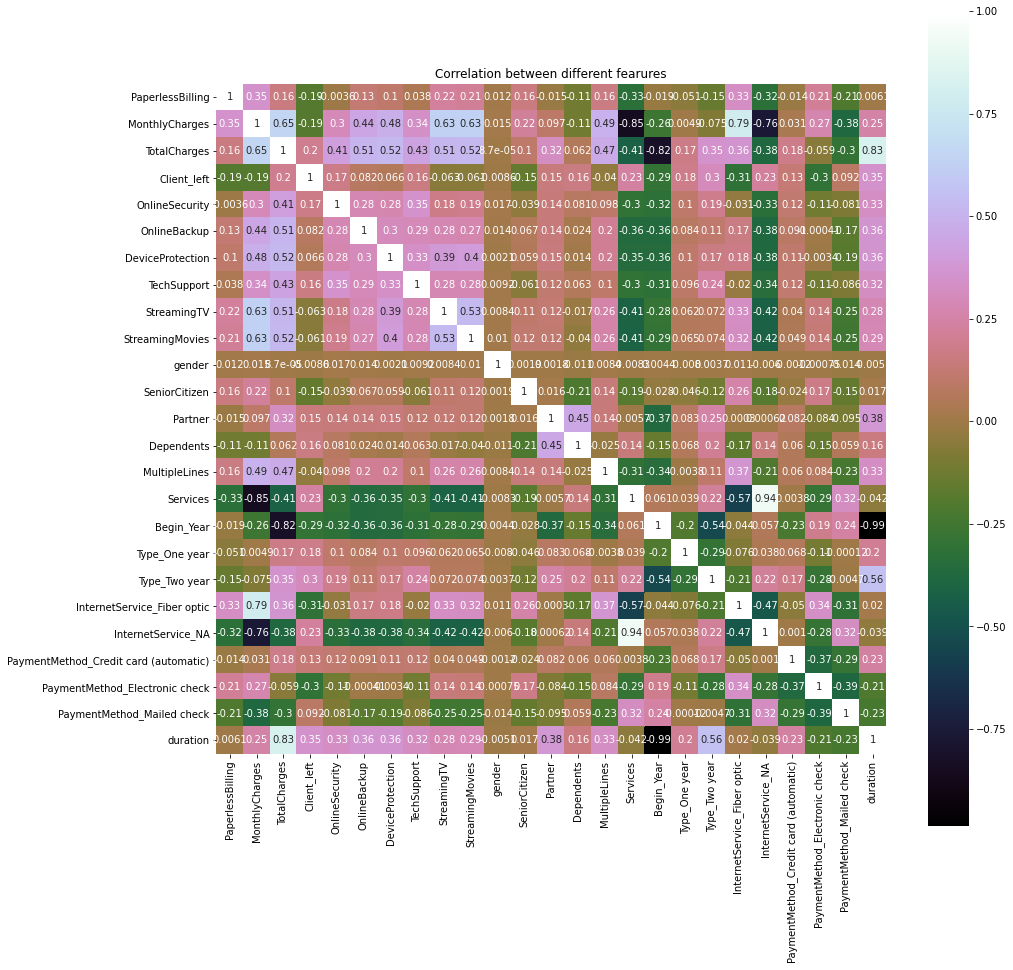

In [49]:
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.show()

Признак TotalCharges и duration сильно коррелируюи между собой, это можно обяъснить тем, что чем дольше клиент пользуется услугами, тем бльше он тратит денег. удалим столбец TotalCharges

In [50]:
data.drop('TotalCharges', axis = 1, inplace = True)

Столбцы Services,Begin_Year так же удалим, т.к. он коррелирует с другими признаками и был нужен для исследовательского анализа

In [51]:
data.drop('Services', axis = 1, inplace = True)
data.drop('Begin_Year', axis = 1, inplace = True)

# Моделирование

In [52]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 250722)

In [53]:
features_train = train_df.drop('Client_left', axis = 1)
features_test = test_df.drop('Client_left', axis = 1)

target_train = train_df['Client_left']
target_test = test_df['Client_left']

## CatBoostClassifier

In [54]:
train_dataset = Pool(features_train, target_train)
test_dataset = Pool(features_test, target_test)

In [55]:
model = CatBoostClassifier(loss_function = 'CrossEntropy',learning_rate = 0.03, random_state = 250722)
model.fit(train_dataset, eval_set = test_dataset, plot = True, verbose = False)
Cat_Model_Prediction_Proba = model.predict_proba(features_test)[:,1]
roc_auc_score(target_test, Cat_Model_Prediction_Proba)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.9255700317138681

Оценим важность фич

In [56]:
feature_importance = model.get_feature_importance(train_dataset, prettified = True)
feature_importance

,Feature Id,Importances
0,duration,54.554134
1,MonthlyCharges,11.313548
2,Type_Two year,5.595191
3,InternetService_Fiber optic,3.253573
4,PaymentMethod_Electronic check,2.302160
5,PaperlessBilling,2.190820
6,Type_One year,2.168300
7,TechSupport,1.859789
8,gender,1.747836
9,Dependents,1.539019


Я бы выделил 11 важных фич, а остальные будем считать менее важными 

In [57]:
Cat_boost_train = features_train[['duration','MonthlyCharges','Type_Two year',\
                              'InternetService_Fiber optic','PaymentMethod_Electronic check','PaperlessBilling','Type_One year','TechSupport', 'gender']]
Cat_boost_test = features_test[['duration','MonthlyCharges','Type_Two year',\
                              'InternetService_Fiber optic','PaymentMethod_Electronic check','PaperlessBilling','Type_One year','TechSupport', 'gender']]
train_dataset = Pool(Cat_boost_train, target_train)
test_dataset = Pool(Cat_boost_test, target_test)

In [58]:
modelCat = CatBoostClassifier( random_state = 250722)
Cat_GRID = GridSearchCV(modelCat,{
    'iterations': [400,500,600,1000],
    'learning_rate' : [0.03],
    'depth' : range(3,15,3),
    'verbose' : [False]
}, cv = 5,scoring = 'roc_auc')

In [59]:
Cat_GRID.fit(Cat_boost_train,target_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024B1B74A850>,
             param_grid={'depth': range(3, 15, 3),
                         'iterations': [400, 500, 600, 1000],
                         'learning_rate': [0.03], 'verbose': [False]},
             scoring='roc_auc')

In [60]:
Cat_GRID.best_params_

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.03, 'verbose': False}

In [61]:
Cat_GRID.best_score_

0.9193873223031493

In [62]:
modelCat = CatBoostClassifier(loss_function = 'CrossEntropy',iterations = 1000, depth = 6,learning_rate = 0.03, random_state = 250722)

In [63]:
modelCat.fit(train_dataset, eval_set = test_dataset, verbose = False)

In [64]:
catPrediction_Proba = modelCat.predict_proba(Cat_boost_test)[:,1]

In [65]:
roc_auc_score(target_test, catPrediction_Proba)

0.9302967700401569

In [66]:
Cat_boost_pred = modelCat.predict(Cat_boost_test)
accuracy_score(target_test,Cat_boost_pred)

0.8914123491838183

## RandomForest

In [67]:
RF = RandomForestClassifier(class_weight = 'balanced', random_state = 250722)

RF.fit(features_train, target_train)

RF_proba = RF.predict_proba(features_test)[:,1]

roc_auc_score(target_test, RF_proba)

0.8422723171175734

Feature importances:
 1. feature 'duration' (0.2626)
 2. feature 'MonthlyCharges' (0.2032)
 3. feature 'Type_Two year' (0.0771)
 4. feature 'InternetService_Fiber optic' (0.0519)
 5. feature 'Type_One year' (0.0351)
 6. feature 'PaymentMethod_Electronic check' (0.0348)
 7. feature 'gender' (0.0291)
 8. feature 'InternetService_NA' (0.0270)
 9. feature 'TechSupport' (0.0270)
10. feature 'PaperlessBilling' (0.0268)
11. feature 'OnlineSecurity' (0.0246)
12. feature 'Partner' (0.0245)
13. feature 'OnlineBackup' (0.0235)
14. feature 'Dependents' (0.0217)
15. feature 'DeviceProtection' (0.0209)
16. feature 'SeniorCitizen' (0.0208)
17. feature 'StreamingMovies' (0.0203)
18. feature 'MultipleLines' (0.0203)
19. feature 'StreamingTV' (0.0191)
20. feature 'PaymentMethod_Credit card (automatic)' (0.0163)
21. feature 'PaymentMethod_Mailed check' (0.0134)


<BarContainer object of 21 artists>

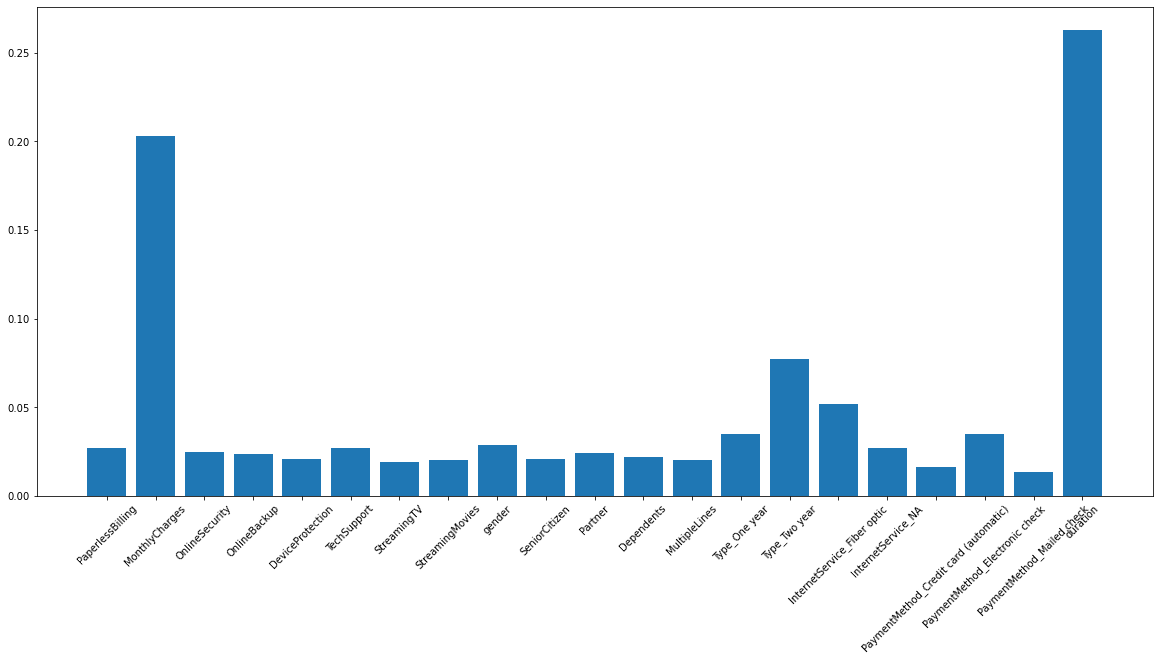

In [68]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=45, fontsize=10) 
feature_import2 = RF.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import2)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import2[idx]))
plt.bar(col_names,feature_import2)


In [69]:
RF_train = features_train[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                              'PaymentMethod_Electronic check','Type_One year','OnlineSecurity','gender','PaperlessBilling']]

In [70]:
RF_test = features_test[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'PaymentMethod_Electronic check','Type_One year','OnlineSecurity','gender','PaperlessBilling']]

In [71]:
RFC = GridSearchCV(RandomForestClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(3,15,3),
    'n_estimators': range(10,100, 10),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [72]:
RFC.fit(RF_train,target_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': range(3, 15, 3),
                         'min_samples_leaf': range(3, 13, 2),
                         'min_samples_split': range(4, 28, 4),
                         'n_estimators': range(10, 100, 10)},
             scoring='roc_auc')

In [73]:
RFC.best_params_

{'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 24,
 'n_estimators': 90}

In [74]:
RFC.best_score_

0.8585924262641317

In [75]:
RFCauc = RandomForestClassifier(class_weight = 'balanced',criterion = 'entropy', max_depth=9, min_samples_leaf=3, min_samples_split=24, n_estimators = 90, random_state = 250722)

RFCauc.fit(RF_train, target_train)

RFCauc_proba = RFCauc.predict_proba(RF_test)[:,1]

roc_auc_score(target_test, RFCauc_proba)

0.8689401974597245

In [76]:
RF_predict = RFCauc.predict(RF_test)
accuracy_score(target_test,RF_predict)

0.7934705464868701

## DecisionTreeClassifier

In [77]:
DT = DecisionTreeClassifier(random_state=250722, class_weight = 'balanced')

DT.fit(features_train, target_train)

DT_proba = DT.predict_proba(features_test)[:,1]

roc_auc_score(target_test, DT_proba)

0.7048908483591635

Feature importances:
 1. feature 'duration' (0.2626)
 2. feature 'MonthlyCharges' (0.2032)
 3. feature 'Type_Two year' (0.0771)
 4. feature 'InternetService_Fiber optic' (0.0519)
 5. feature 'Type_One year' (0.0351)
 6. feature 'PaymentMethod_Electronic check' (0.0348)
 7. feature 'gender' (0.0291)
 8. feature 'InternetService_NA' (0.0270)
 9. feature 'TechSupport' (0.0270)
10. feature 'PaperlessBilling' (0.0268)
11. feature 'OnlineSecurity' (0.0246)
12. feature 'Partner' (0.0245)
13. feature 'OnlineBackup' (0.0235)
14. feature 'Dependents' (0.0217)
15. feature 'DeviceProtection' (0.0209)
16. feature 'SeniorCitizen' (0.0208)
17. feature 'StreamingMovies' (0.0203)
18. feature 'MultipleLines' (0.0203)
19. feature 'StreamingTV' (0.0191)
20. feature 'PaymentMethod_Credit card (automatic)' (0.0163)
21. feature 'PaymentMethod_Mailed check' (0.0134)


<BarContainer object of 21 artists>

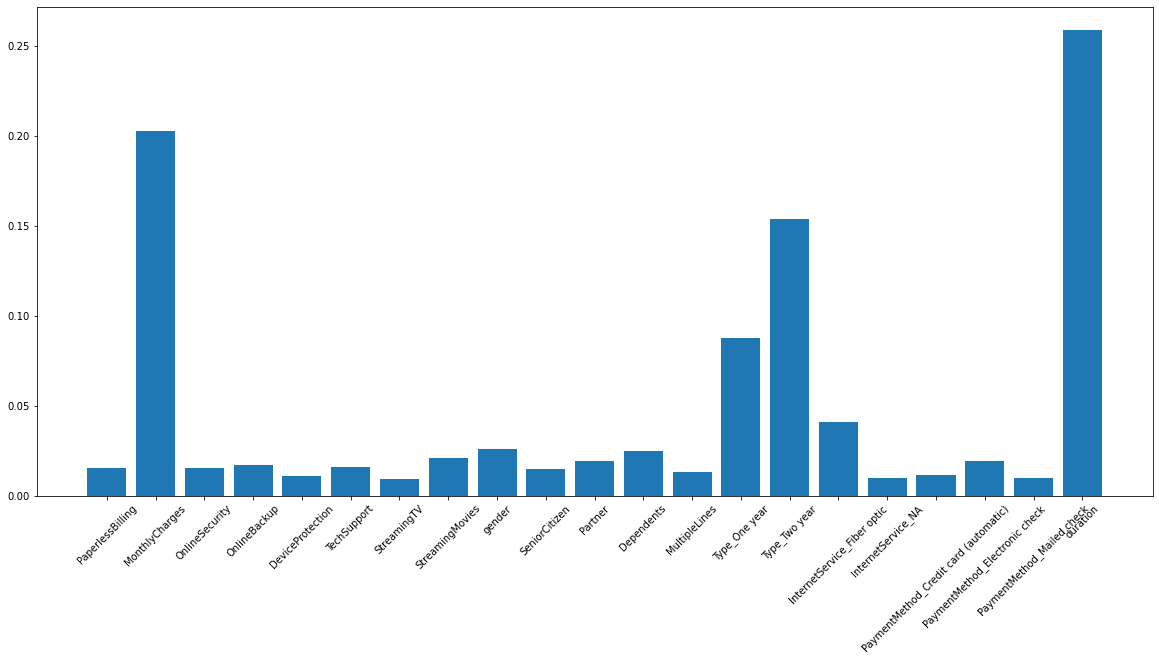

In [78]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=45, fontsize=10) 
feature_importance3 = DT.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import2)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import2[idx]))
plt.bar(col_names,feature_importance3)

In [79]:
DT_train = features_train[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'Type_One year','PaymentMethod_Electronic check','gender','InternetService_NA','TechSupport']]

In [80]:
DT_test = features_test[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'Type_One year','PaymentMethod_Electronic check','gender','InternetService_NA','TechSupport']]

In [81]:
DTG = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(1, 10, 20),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [82]:
DTG.fit(DT_train,target_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': range(1, 10, 20),
                         'min_samples_leaf': range(3, 13, 2),
                         'min_samples_split': range(4, 28, 4)},
             scoring='roc_auc')

In [83]:
DTG.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [84]:
DTG.best_score_

0.6481243934767025

In [85]:
DTGauc = DecisionTreeClassifier(class_weight = 'balanced', max_depth=1, min_samples_leaf=3, min_samples_split=4, random_state = 250722)

DTGauc.fit(DT_train, target_train)

DTGauc_proba = DTGauc.predict_proba(DT_test)[:,1]

roc_auc_score(target_test, DTGauc_proba)

0.6390568686117135

In [86]:
DT_predict = DTGauc.predict(DT_test)
accuracy_score(target_test,DT_predict)

0.47835344215755854

## Итоговые результаты


In [87]:
results = {
    'Model' : ['CatBoostClassifier', 'RandomForest', 'DecisionTreeClassifier'],
    'Значение метрики ROC-AUC' :pd.Series([0.930,  0.869, 0.639]),
    'Значение метрики accuracy': pd.Series([0.891, 0.789,  0.478]),
    }
display(pd.DataFrame(results))

,Model,Значение метрики ROC-AUC,Значение метрики accuracy
0,CatBoostClassifier,0.930,0.891
1,RandomForest,0.869,0.789
2,DecisionTreeClassifier,0.639,0.478


# Вывод


Мы провели тестроивание моделей, самые точные предсказания получили у модели CatBoostClassifier с гиперпараметрами:

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.03, 'verbose': False}

- Значение метрики ROC_AUC - 0,93
- Значение метрики accuracy - 0.891

#  Общий вывод

Оператор связи «Ниединогоразрыва.ком» хотел научиться прогнозировать отток клиентов. Для этого нам предоставлили данные:

1. информация о договорах,  
2. персональные данные клиентов,
3. информация об интернет-услугах,
4. информация об услугах телефонии.

Мы провели предобработку данных, а конкретнее:

- объединили данные в один датасет, для удобства работы
- изменили необходимые типы данных
- заполнили пропущенные значения

В исследовательском анализе провели:

- Сравнили распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. 
- Для каждой группы посчитали статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. 
- Построили гистограммы распределения
- Сравниили поведение клиентов этих двух групп. 

Выводы из исследовательского анализа:

- 69 % клиентов пользуются всеми услугами предоставляемыми компанией. 10 % пользуются только телефоном и 21% пользуются только интернетом
- Из ушедших клиентов 85 % пльзовались всеми услугами, 6% только телефоном, а 9% только интернетом.
- Отюсда можно сделать вывод, что проблема заключается не в конкретной услуге, а в целом клиенты не довольны компанией. Опять же, возможно предоставляемые услуги сильно возрасли в цене. 
- Самый большой отток клиентов был в 2019 году (точнее к концу года случился просто обвал)


Для решения поставленной задачи мы закодировали категориальные признакки, разделили данные на две выборки:
1. Обучающую (80%)
2. Тестовую (20%)


Далее обучали и проверяли модели 'CatBoostClassifier', 'RandomForest', 'DecisionTreeClassifier'

Проверили все модели на тестовых выборках. Самое точное предсказание получили с помощью модели CatBoostClassifier, для которой значение ROC_AUC на тестовой выборке получилось =  0.93

**ИТОГ И РЕКОМЕНДАЦИИ ДЛЯ «Ниединогоразрыва.ком»**

1. Рекомендуем оператору проанализировать события конца 2019 года, где у произошёл большой обвал бользователей. Могла сильно измениться ценовая политика и большая часть клиентов просто не могла столько денег тратить на связь.

2. Для прогнозированния оттока рекоменуем использовать модель CatBoostClassifier с параметрами: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.03, 'verbose': False}



# Отчёт по проекту "Прогнозирование оттока клиентов" для оператора связи «Ниединогоразрыва.ком» 


В данной работе мы поставили себе план и не сильно от него отклонялись. Выполненые шаги по плану были:

1. Изучили полученные данные и предобработали их:

- объединили данные в один датасет, для удобства работы
- изменили необходимые типы данных (BeginDate, EndDate к формату даты, а TotalCharges к формату float)
- заполнили пропущенные значения ( В столбце TotalCharges имелись пропущенные значения для клиентов, которые являются клиентом меньше месяца, заполняли данные пропуски значениями платежа за месяц MonthlyCharges)

2. Провели исселовательский анализ данных 

- Сравнили распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. 
- Для каждой группы посчитали статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. 
- Построили гистограммы распределения
- Сравниили поведение клиентов этих двух групп. 

Выводы получившиеся из исследовательского анализа

- 69 % клиентов пользуются всеми услугами предоставляемыми компанией. 10 % пользуются только телефоном и 21% пользуются только интернетом
- Из ушедших клиентов 85 % пльзовались всеми услугами, 6% только телефоном, а 9% только интернетом.
- Отюсда можно сделать вывод, что проблема заключается не в конкретной услуге, а в целом клиенты не довольны компанией. Опять же, возможно предоставляемые услуги сильно возрасли в цене. 
- Самый большой отток клиентов был в 2019 году (точнее к концу года случился просто обвал)

3. Разделили данные на выборки (80% обучающую и 20% тестовую), подобрали параметры гиперпараметров и обучили модели



4. Проанализировали резуьтаты работы наших моделей



5. Сделали итоговый вывод



Без труднойстей, конечно же, тоже не обошлось. Больше всего пришлось повозиться и подумать в исследовательском анализе и при отборе признаков. Для решения данных задач мы испльзвали различные инструменты:

* Разделяли группы на уже ушедших и оставшихся клиентов.
* С помощию средств библиотеки `matplotlib.pyplot` построили наглядные графики для визуализации по ушешим и оставшимся клиентам (выводы по данному разделу приведены выше)
* С помощью get_feature_importance нашли самые важные фичи для построения наших моделей
* Кодировали категориальные признаки 

По результату подготовки к моделированию и при построении моделей выяснили, что двумя самыми важными признаками при построении модели мы смогли выделить duration (какое количество человек является клиентом нашего сервиса) и MonthlyCharges (сумма ежемесячного платежа)((не и ещё 9 штук хехе, но самыми важными будут именно они))


По итогу наилучшим результатом обладает модель CatBoostClassifier на тестовой выборке - значение метрики ROC-AUC 0.93 и значение метрики accuracy 0.89.

**ИТОГ И РЕКОМЕНДАЦИИ ДЛЯ «Ниединогоразрыва.ком»**

1. Рекомендуем оператору проанализировать события конца 2019 года, где у произошёл большой обвал бользователей. Могла сильно измениться ценовая политика и большая часть клиентов просто не могла столько денег тратить на связь.

2. Для прогнозированния оттока рекоменуем использовать модель CatBoostClassifier с параметрами: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.03, 'verbose': False}

